In [2]:
import numpy as np
import pandas as pd
import pickle

pd.set_option("display.max_colwidth",150)

In [3]:
with open(r"F:\NLP\data\clean_data.pkl",'rb') as f:
    clean_data = pickle.load(f)

clean_data.head()

,text,label,polarity
0,grew b watching loving thunderbirds mates school watched played thunderbirds school lunch school wanted virgil scott one wanted alan counting be...,0,0.077400
1,put movie dvd player sat coke chips expectations hoping movie would contain strongpoints first movie awsome animation good flowing story excellent...,0,0.081607
2,people know particular time past like feel need try define time others replace woodstock civil war apollo moonlanding titanic sinking youve got re...,0,-0.244922
3,even though great interest biblical movies bored death every minute movie everything bad movie long acting time joke script horrible get point mix...,0,-0.198300
4,im die hard dads army fan nothing ever change got tapes dvds audiobooks every time watchlisten brand new br br film film run certain episodes man ...,1,0.087178


1    19908
0    19815
Name: label, dtype: int64


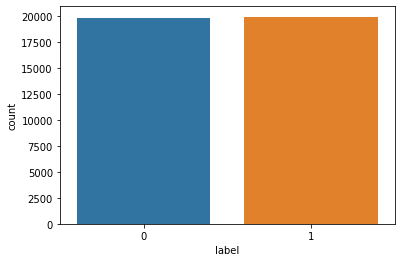

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

print(clean_data['label'].value_counts())

sns.countplot(x='label',data=clean_data)
plt.show()

In [5]:
clean_data['lenthOfText'] = clean_data['text'].map(len)
clean_data

,text,label,polarity,lenthOfText
0,grew b watching loving thunderbirds mates school watched played thunderbirds school lunch school wanted virgil scott one wanted alan counting be...,0,0.077400,610
1,put movie dvd player sat coke chips expectations hoping movie would contain strongpoints first movie awsome animation good flowing story excellent...,0,0.081607,1118
2,people know particular time past like feel need try define time others replace woodstock civil war apollo moonlanding titanic sinking youve got re...,0,-0.244922,633
3,even though great interest biblical movies bored death every minute movie everything bad movie long acting time joke script horrible get point mix...,0,-0.198300,212
4,im die hard dads army fan nothing ever change got tapes dvds audiobooks every time watchlisten brand new br br film film run certain episodes man ...,1,0.087178,680
...,...,...,...,...
39718,western union something forgotten classic western perhaps reason lies fact unavailability dvd united states however lost appeared region england ...,1,-0.000300,2107
39719,movie incredible piece work explores every nook cranny human mind focusing characters relationships people around stellar performances around one ...,1,0.090271,192
39720,wife watched movie plan visit sicily stromboli soon fortunately unfortunately landscape seascape complete tuna believable members cast expected re...,0,-0.024609,774
39721,first watched flatliners amazed necessary features good movie cast superb plot superb case thrillers genuine thrills throughoutbr br keifer suther...,1,0.347300,713


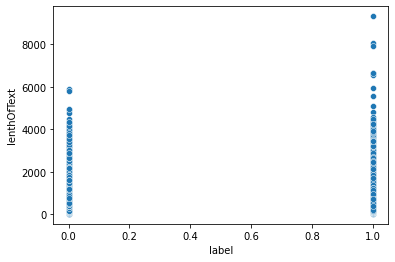

In [6]:
sns.scatterplot(x='label',y='lenthOfText',data=clean_data)
plt.show()

##### The avg lenght of positve review is more than that of negative reviews

In [7]:
clean_data.drop('lenthOfText',inplace=True,axis=1)
clean_data.head()

,text,label,polarity
0,grew b watching loving thunderbirds mates school watched played thunderbirds school lunch school wanted virgil scott one wanted alan counting be...,0,0.077400
1,put movie dvd player sat coke chips expectations hoping movie would contain strongpoints first movie awsome animation good flowing story excellent...,0,0.081607
2,people know particular time past like feel need try define time others replace woodstock civil war apollo moonlanding titanic sinking youve got re...,0,-0.244922
3,even though great interest biblical movies bored death every minute movie everything bad movie long acting time joke script horrible get point mix...,0,-0.198300
4,im die hard dads army fan nothing ever change got tapes dvds audiobooks every time watchlisten brand new br br film film run certain episodes man ...,1,0.087178


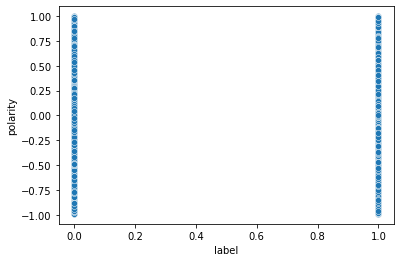

In [9]:
sns.scatterplot(x='label',y='polarity',data=clean_data)
plt.show()

#### Stemming of text

In [7]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
from nltk.stem import LancasterStemmer
from nltk.tokenize import sent_tokenize,word_tokenize

stemmer = LancasterStemmer()

def stem_sentence(sentence : str) -> str:
    token_word = word_tokenize(sentence)
    stemSentence = []
    for word in token_word:
        stemSentence.append(stemmer.stem(word))
    return " ".join(stemSentence)

clean_data['text'] = clean_data['text'].apply(stem_sentence)

In [10]:
# to store this stemed data in pickle file
# clean_data.to_pickle(r"F:\NLP\data\stemed_data.pkl")

In [5]:
stemed_data = pd.read_pickle(r"F:\NLP\data\stemed_data.pkl")
stemed_data['polarity'] = clean_data['polarity']

stemed_data.head()
# # stemed_data.to_pickle(r"F:\NLP\data\stemed_data.pkl")

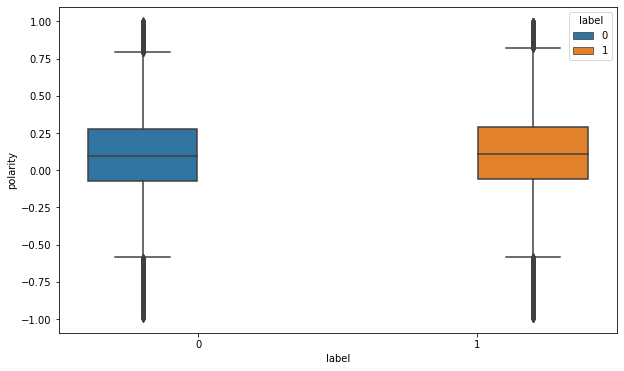

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(x='label',y='polarity',data=stemed_data,hue='label')
plt.show()

In [6]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

data_dtm = cv.fit_transform(stemed_data['text'][:100]).toarray()
data_dtm = pd.DataFrame(data_dtm,columns=cv.get_feature_names_out())

In [7]:
data_dtm

,aaron,aback,abandon,abbey,abc,abl,abound,abraham,absolv,abstract,...,youthwoo,youv,yupanqu,zap,zasu,zeal,zero,zesty,zomby,zoot
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
